If you are viewing this page on github, you are seeing a static rendering of the notebook not the interactive version described in the blog post. You can see the interactive version on [mybinder.org](https://mybinder.org/v2/gh/DentonGentry/blog-posts/master?urlpath=lab/tree/LineGraphs.ipynb).

In [15]:
# generate data for subsequent cells to graph
import pandas as pd
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)

In [20]:
# https://matplotlib.org/
import matplotlib
import matplotlib.pyplot as plt
%matplotlib ipympl

plt.plot(t, s)
plt.grid(True)
plt.show()
# If nothing appears, please run this cell a second time.

FigureCanvasNbAgg()

In [14]:
# https://bokeh.pydata.org/
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool
output_notebook()
p = figure(plot_width=400, plot_height=400)
p.line(t, s)
hover = HoverTool(tooltips =[('x','@x'),('y','@y')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

In [19]:
# https://hvplot.pyviz.org/
import hvplot as hv
import hvplot.pandas
df = pd.DataFrame(s, index=t)
df.hvplot(grid=True)

:Curve   [index]   (0)

In [5]:
# https://beakerx.com
import beakerx

bkp = beakerx.Plot()
bkp.add(beakerx.Line(x=t, y=s))

In [26]:
# https://github.com/bloomberg/bqplot
import bqplot
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
def_tt = bqplot.Tooltip(fields=['x', 'y'], formats=['.2f', '.2f'])
line_chart = bqplot.Lines(x=t, y=s, scales= {'x': x_sc, 'y': y_sc}, tooltip=def_tt)
ax_x = bqplot.Axis(scale=x_sc)
ax_y = bqplot.Axis(scale=y_sc, orientation='vertical')
panzoom = bqplot.PanZoom(scales={'x': [x_sc], 'y': [y_sc]})
bqplot.Figure(marks=[line_chart], axes=[ax_x, ax_y], interaction=panzoom)

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

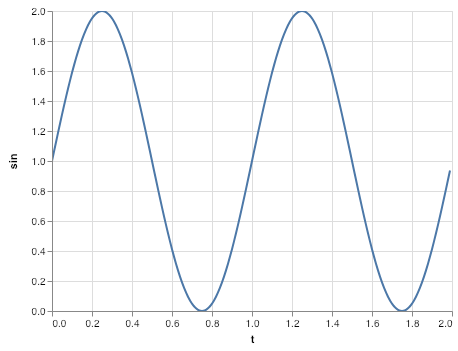

In [27]:
# https://altair-viz.github.io/
import altair as alt

df = pd.DataFrame(list(zip(s, t)), columns=['sin', 't'])
alt.Chart(df).mark_line().encode(
    y='sin',
    x='t',
    tooltip=['sin', 't']
).interactive()

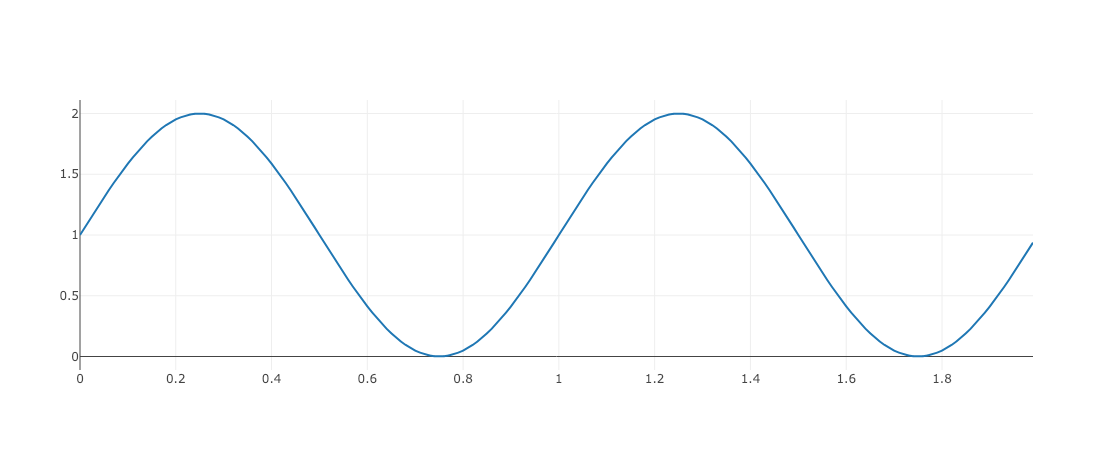

In [13]:
import plotly

data = [go.Scatter(x=t, y=s)]
plotly.offline.iplot(data)